In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df =pd.read_csv("bank/bank-additional.csv", sep= ";")

In [10]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


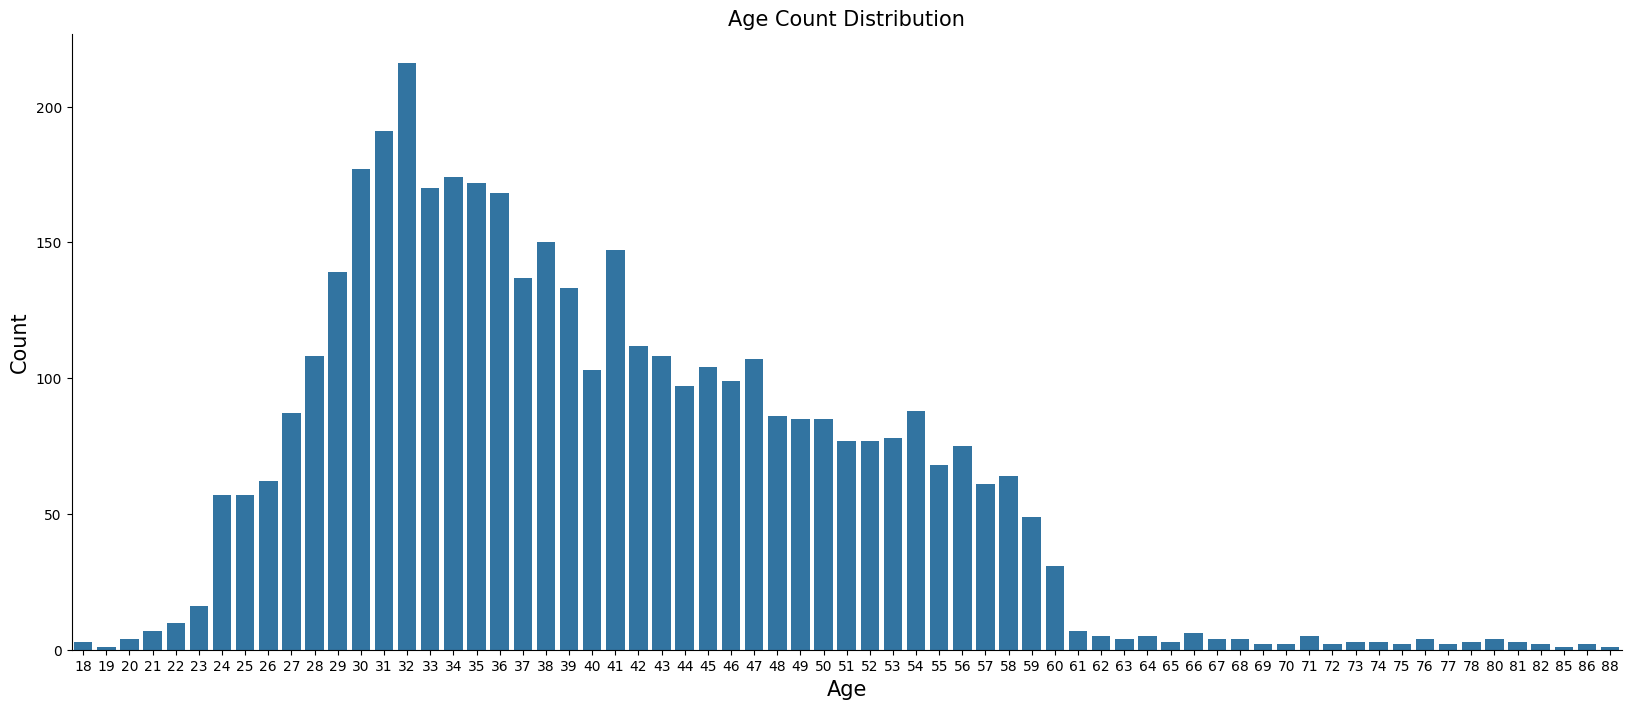

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
plt.savefig('age_distribution')
sns.despine()

<Axes: xlabel='y', ylabel='age'>

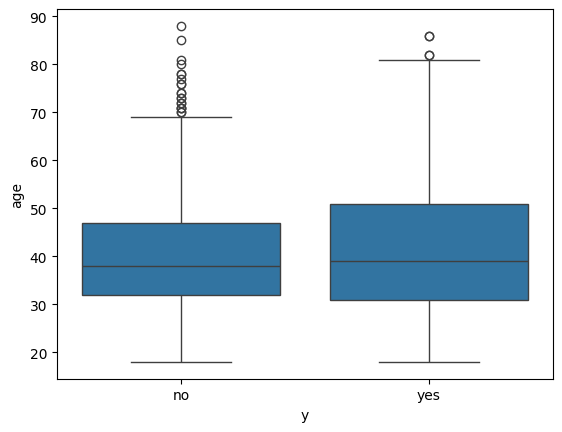

In [12]:
sns.boxplot(x=df['y'],y=df['age'])

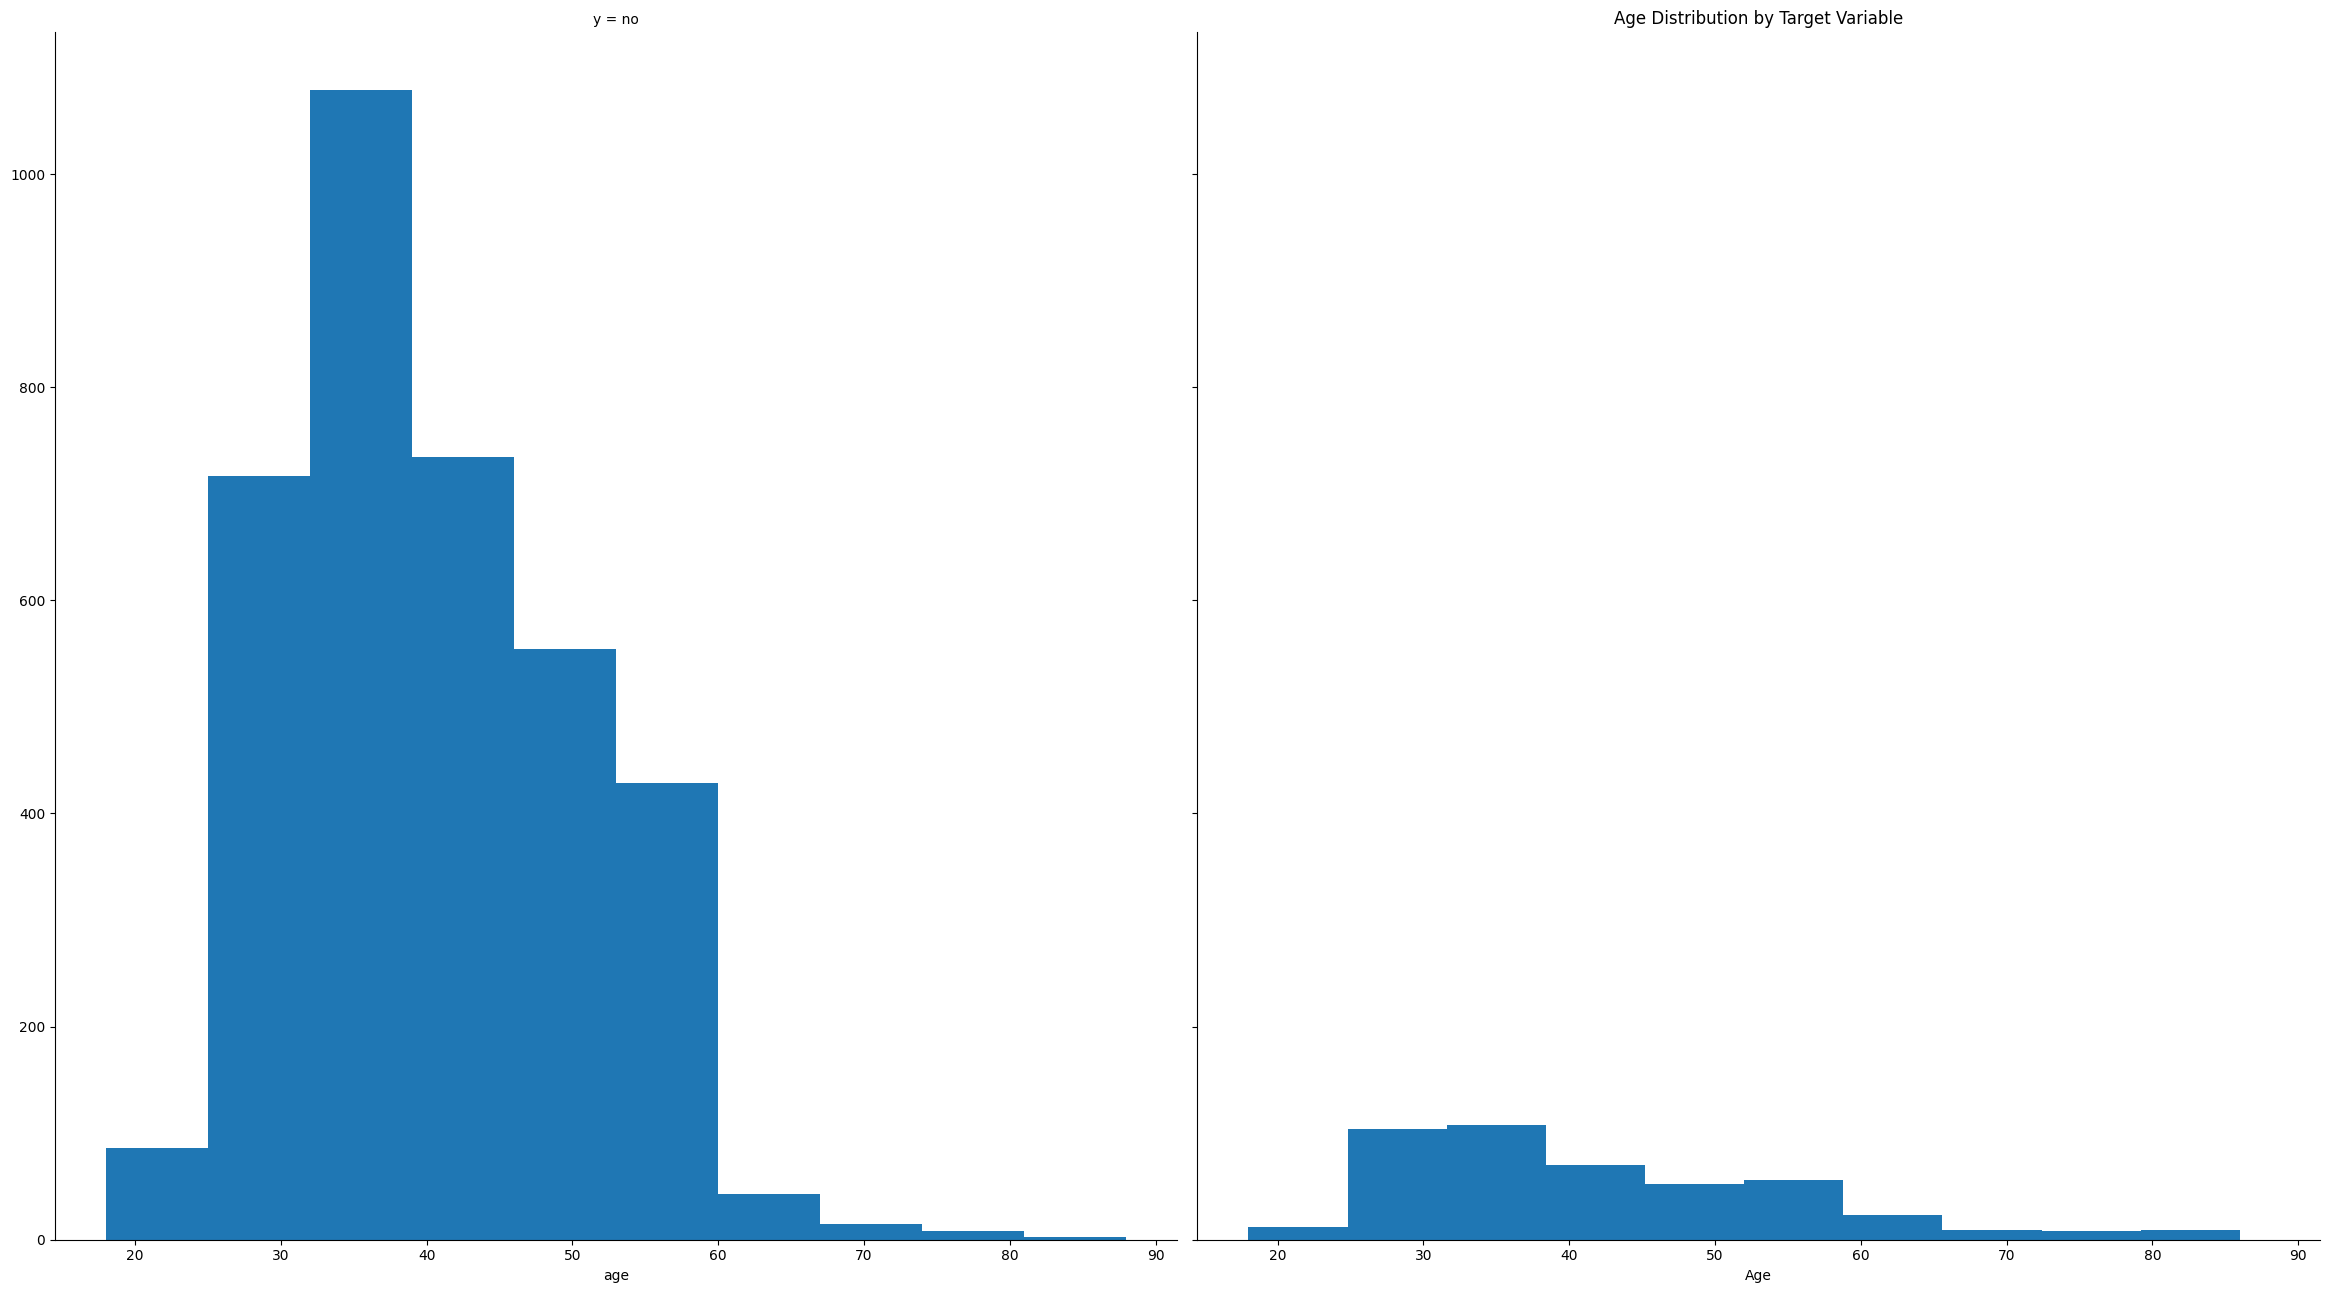

In [16]:
g = sns.FacetGrid( df, col="y", height=13, aspect=.9)
g.map(plt.hist, "age")
plt.title('Age Distribution by Target Variable')
plt.xlabel('Age')
plt.ylabel('Frequency of Age')
g.savefig("age_by_class.png")

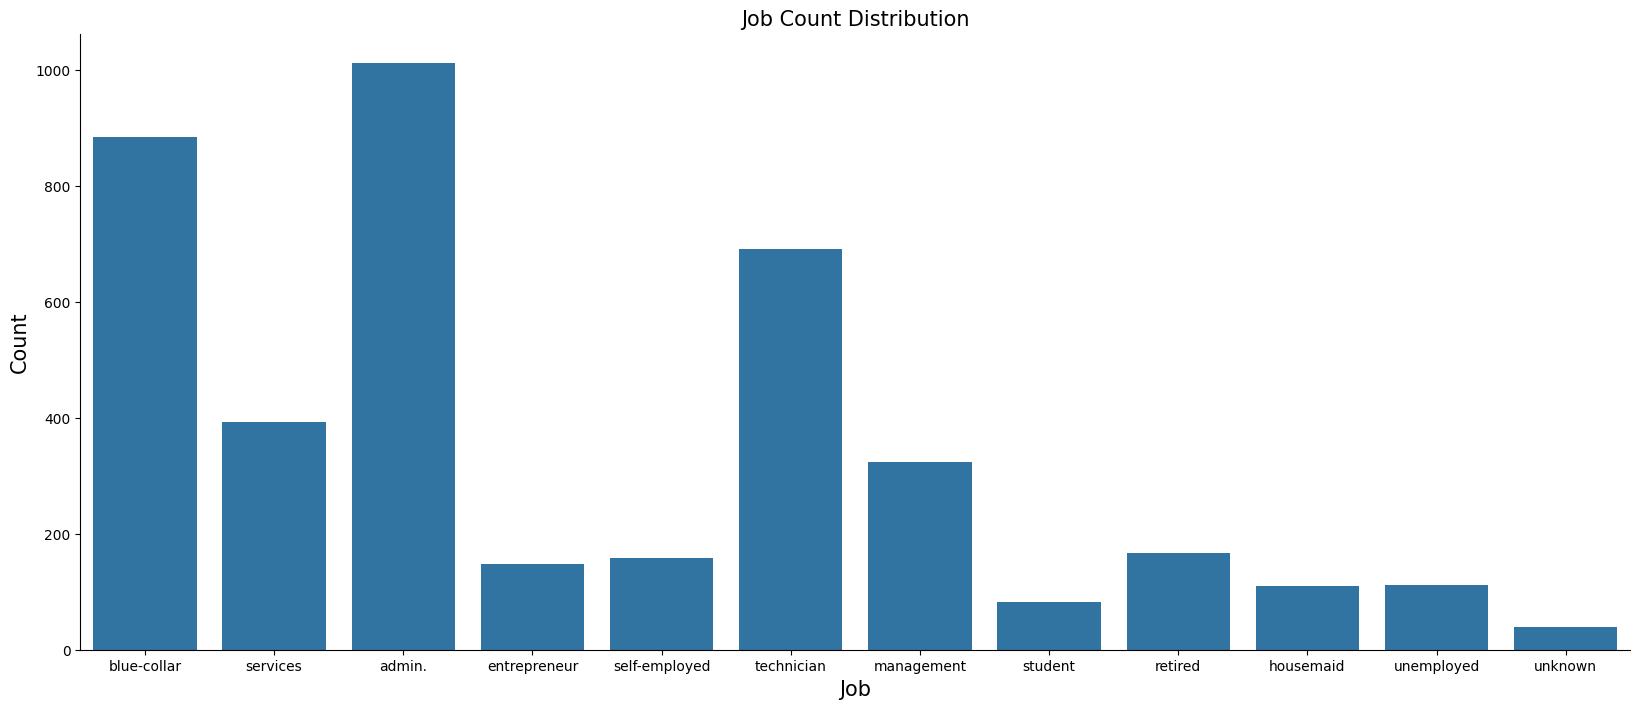

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
plt.savefig('job_distribution')
sns.despine()

c:\Users\Firdaus\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


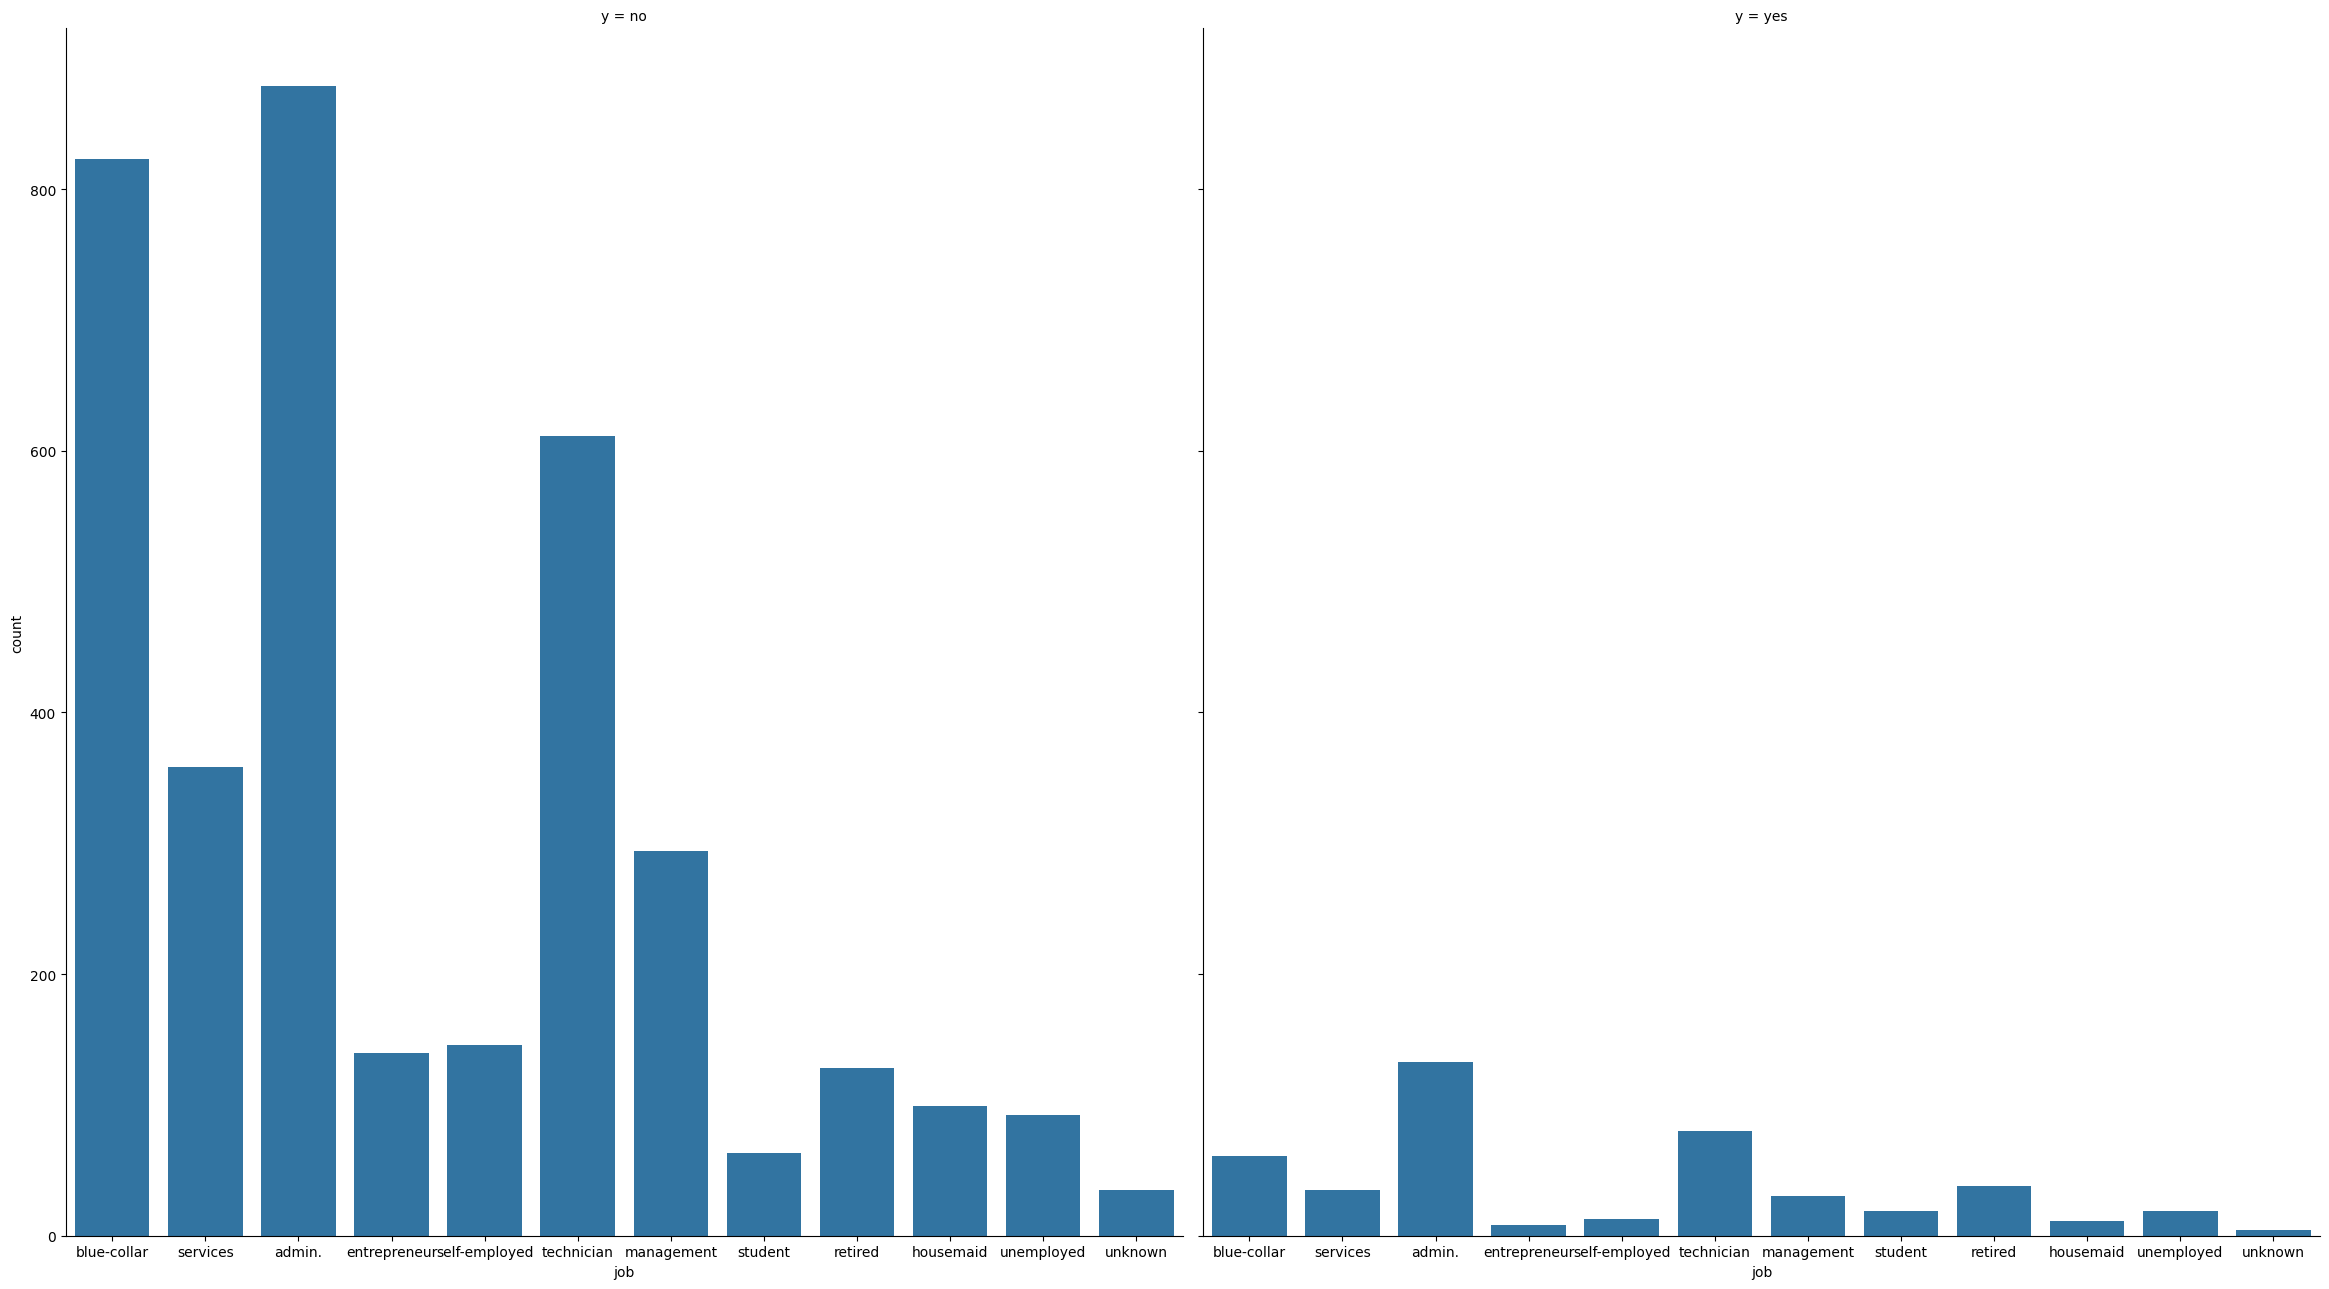

In [18]:
g = sns.FacetGrid(df, col="y", height=13, aspect=.9)
g.map(sns.countplot, "job")

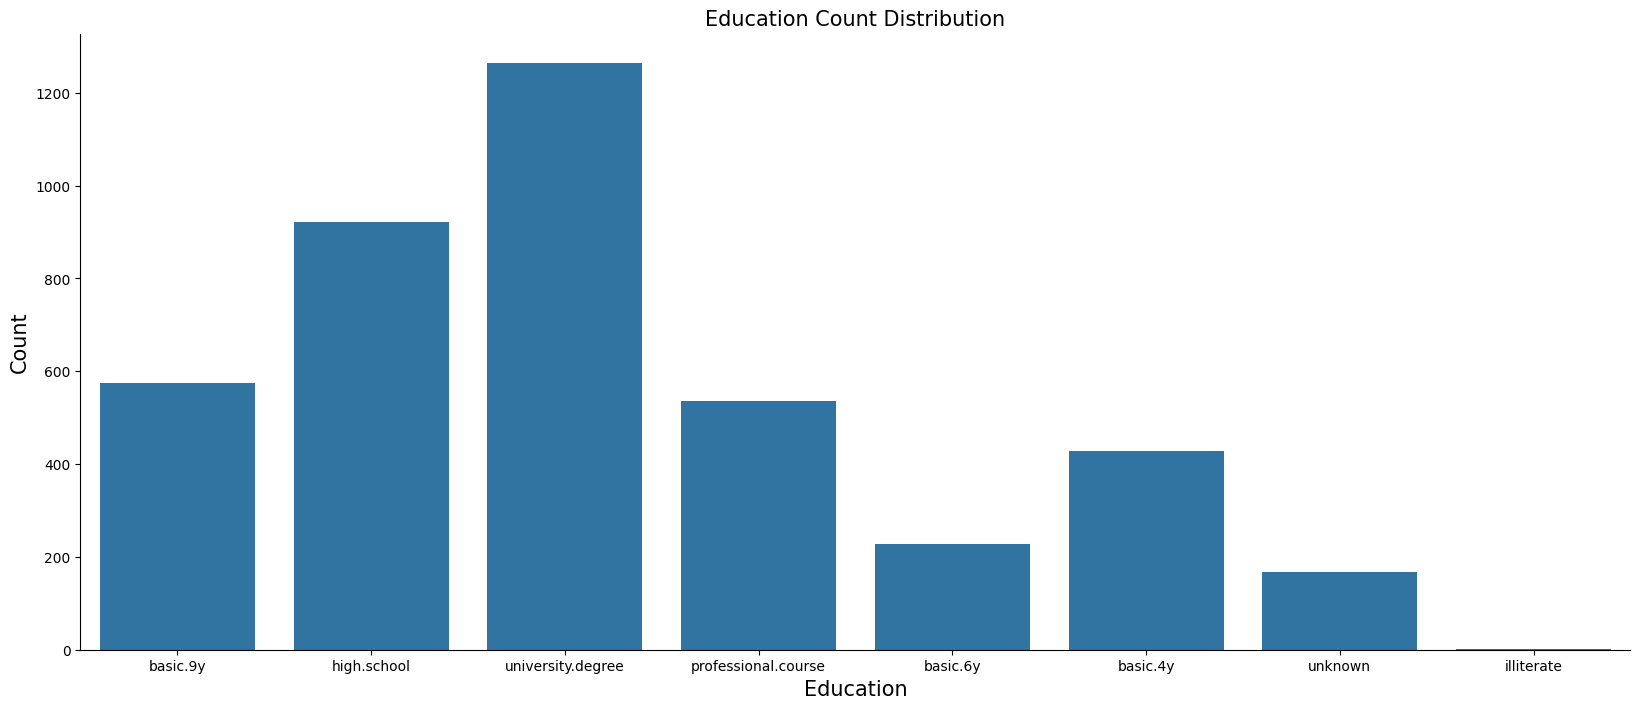

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x = 'education', data = df)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
sns.despine()

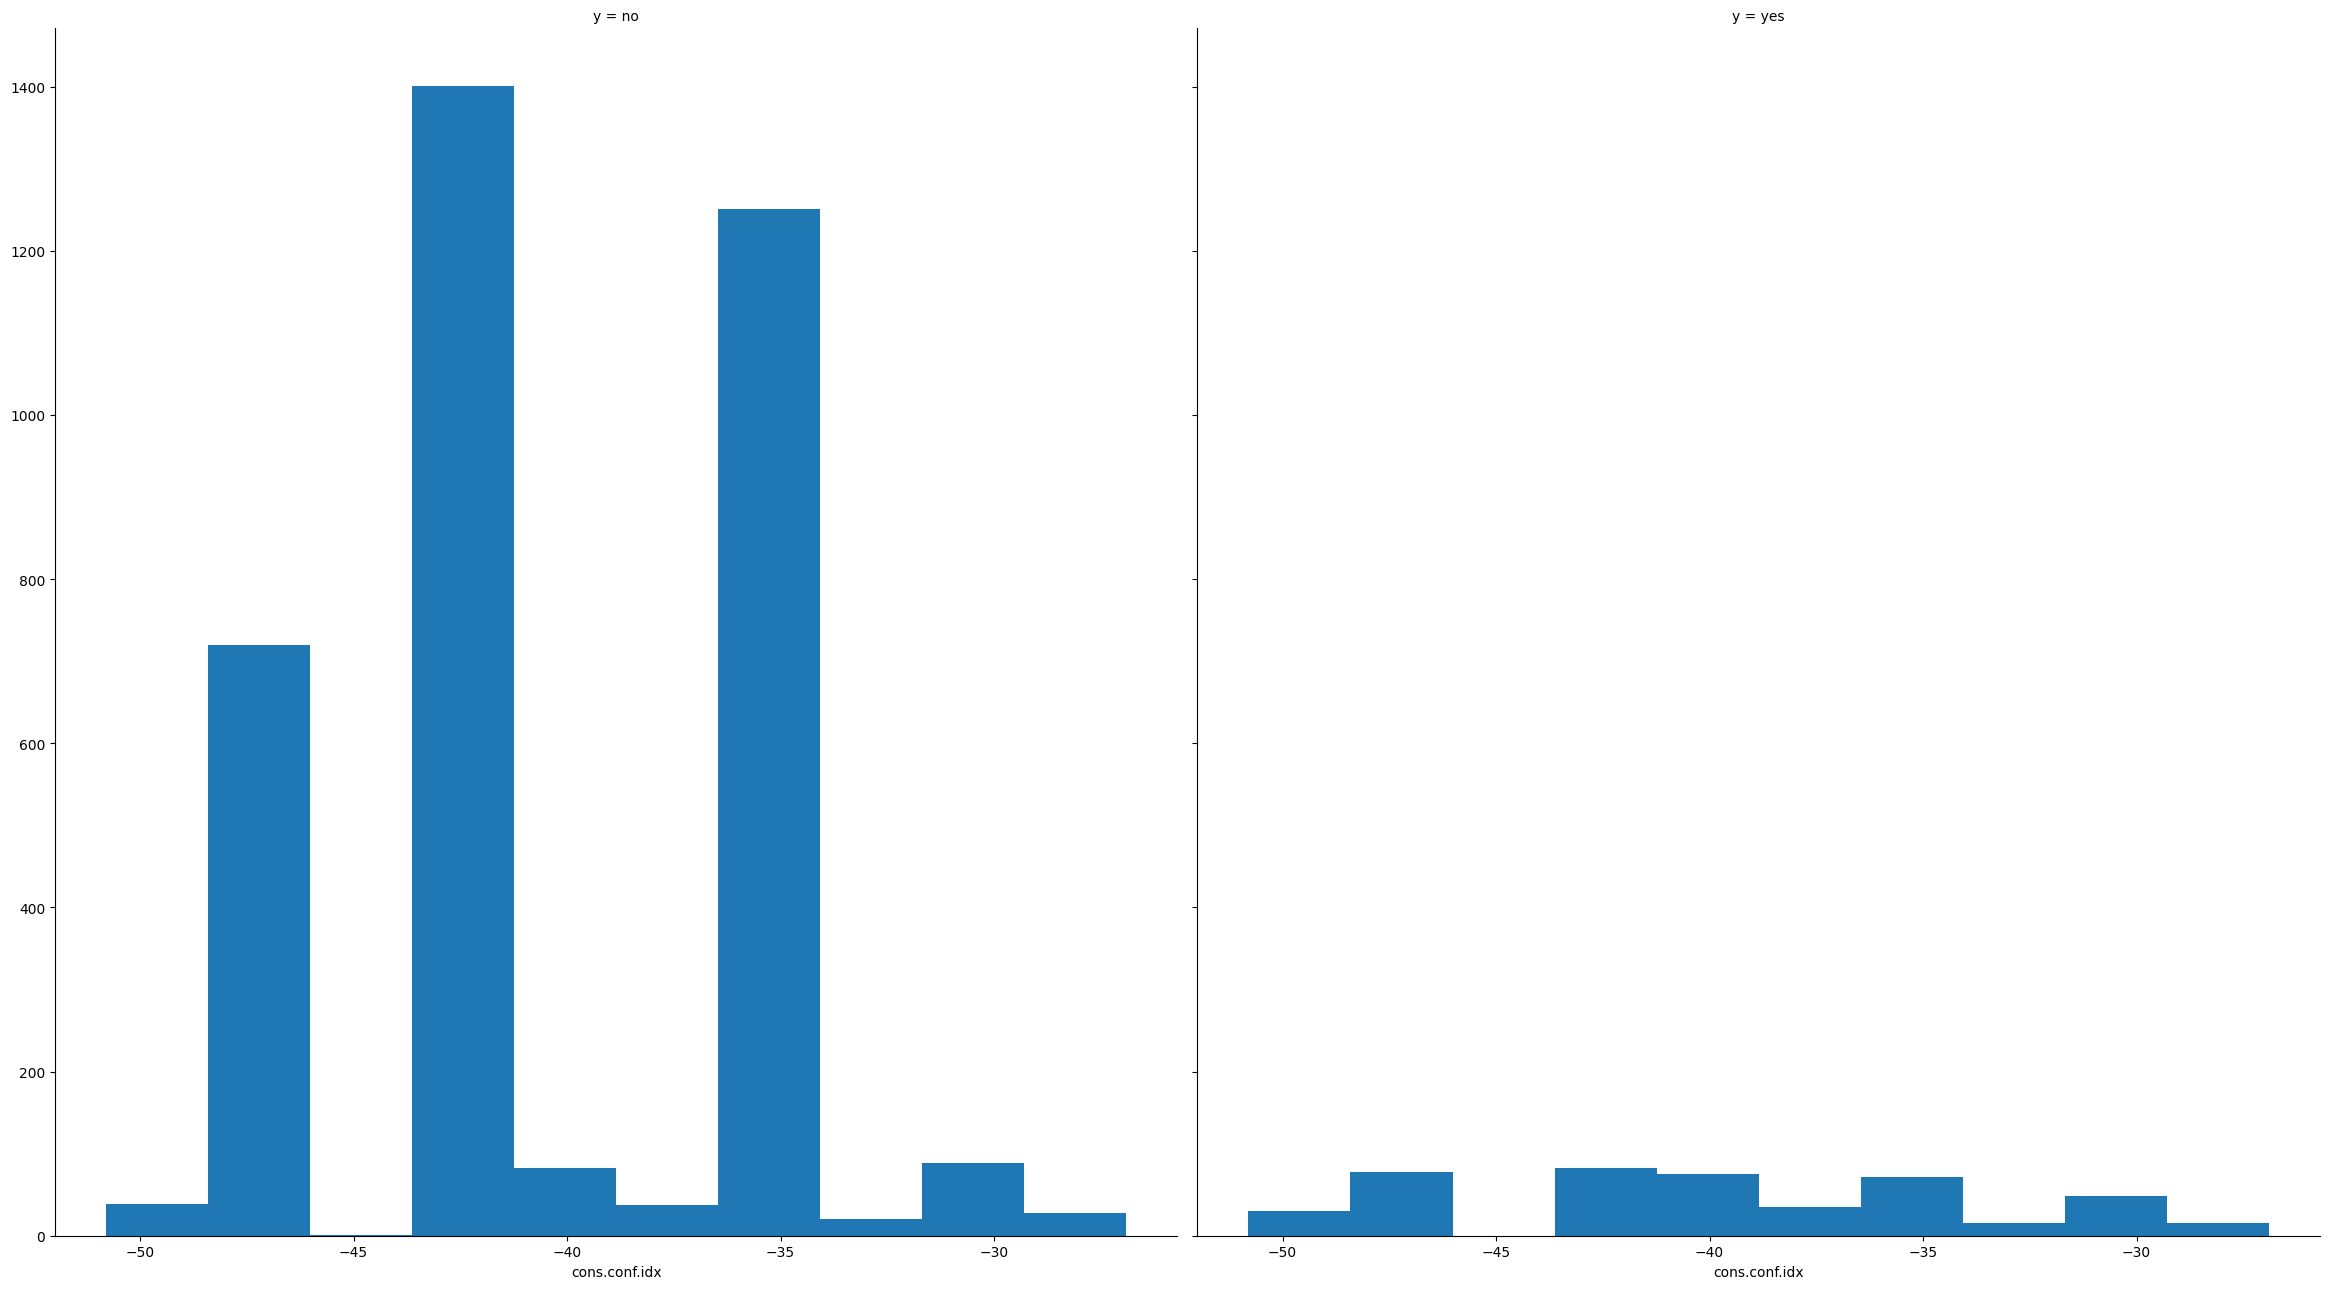

In [20]:
g = sns.FacetGrid(df, col="y", height=13, aspect=.9)
g.map(plt.hist, "cons.conf.idx")

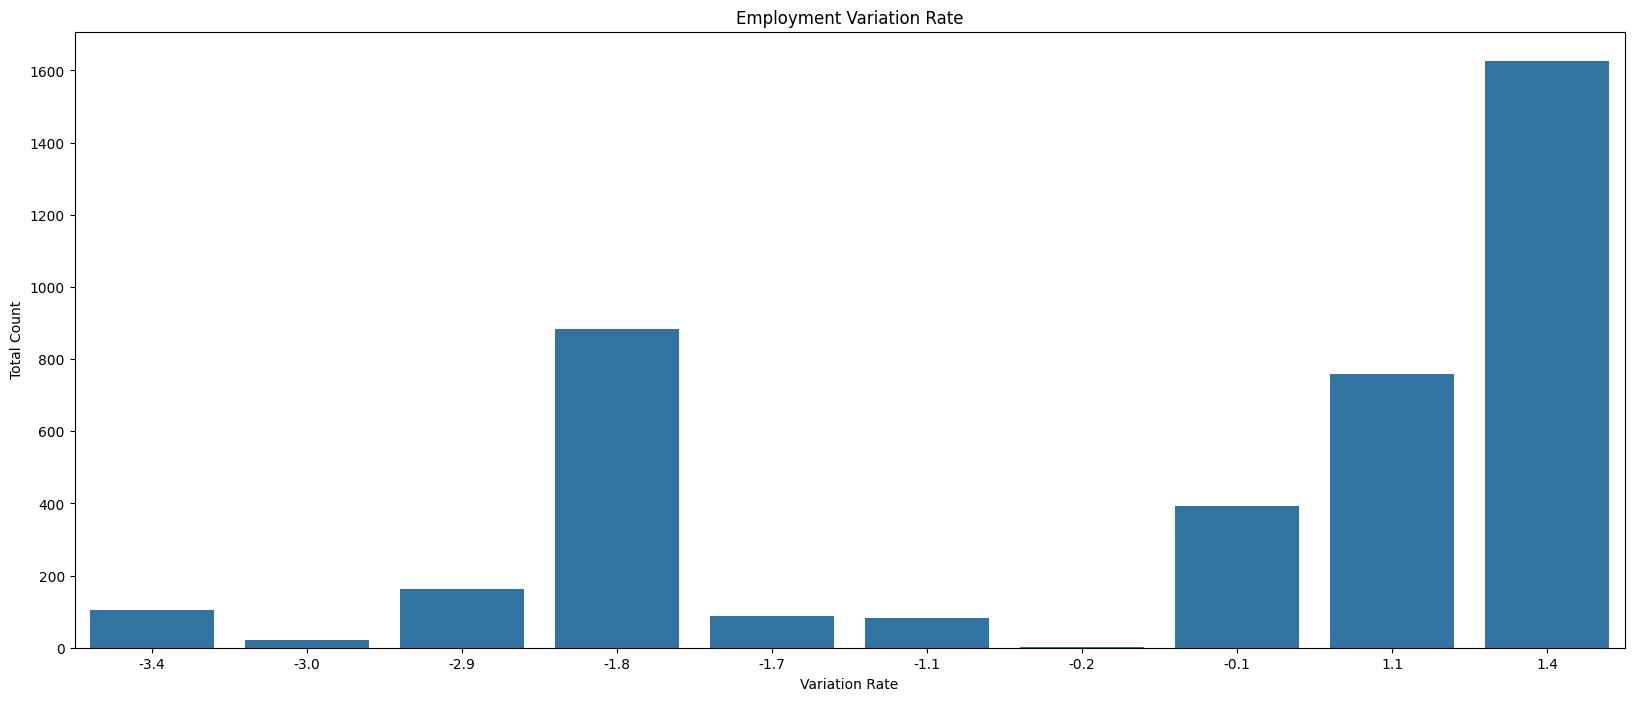

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
emp_var_rate_chart = sns.countplot(x=df['emp.var.rate'])
plt.title('Employment Variation Rate')
plt.xlabel('Variation Rate')
plt.ylabel('Total Count')
emp_var_rate_chart.figure.savefig("emp_var_rate.png")

c:\Users\Firdaus\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


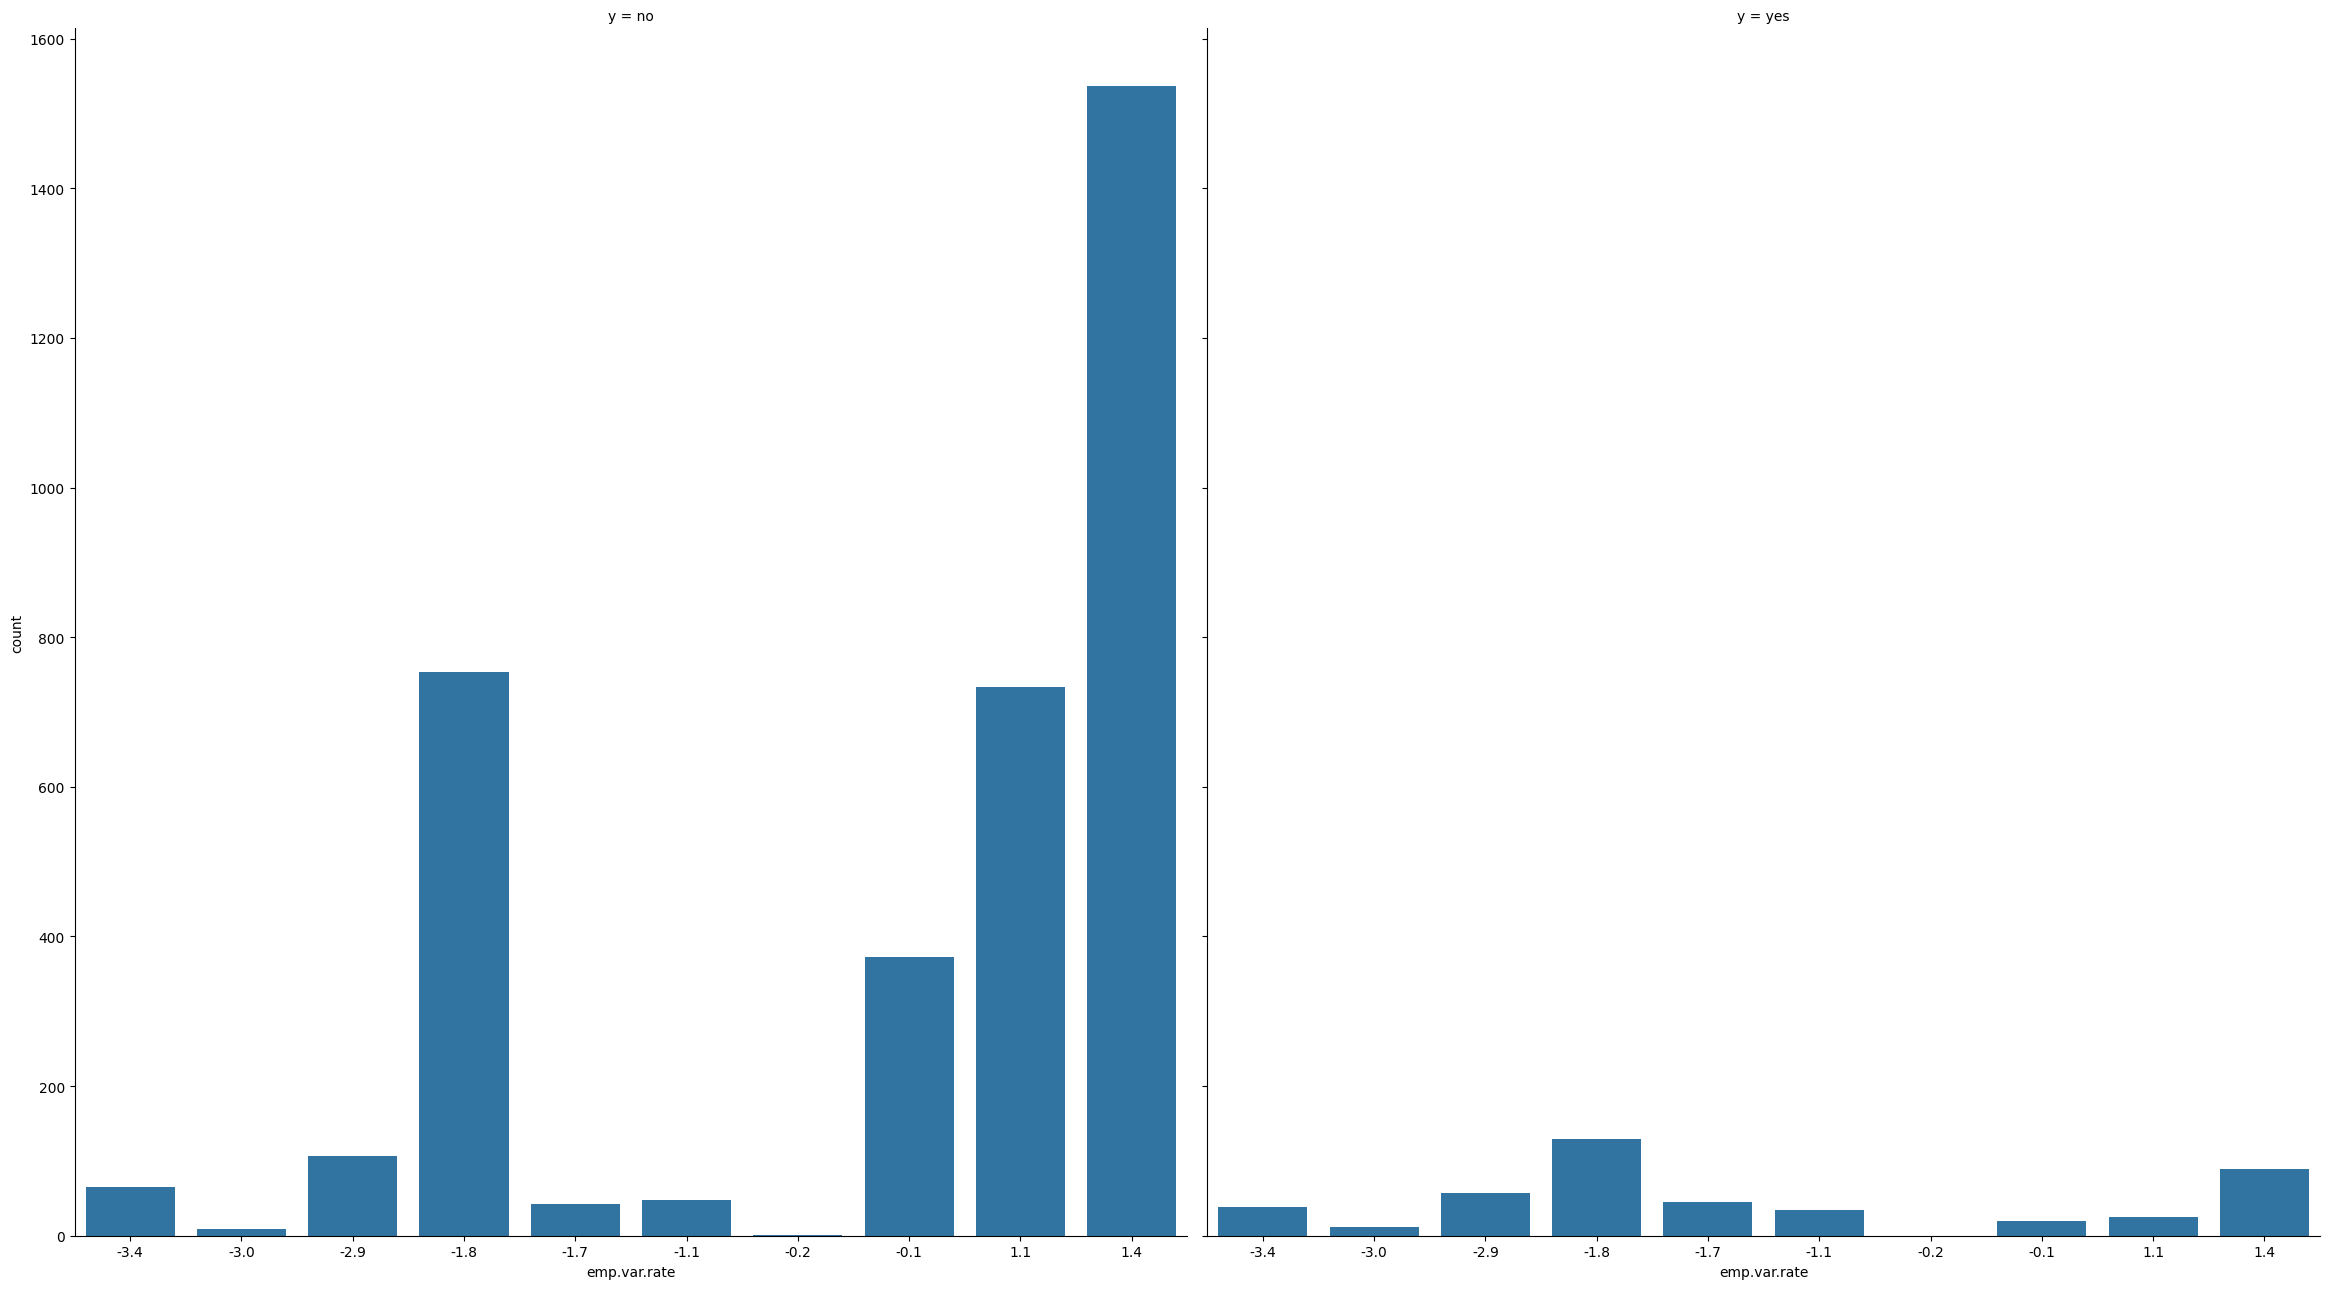

In [22]:
g = sns.FacetGrid(df, col="y", height=13, aspect=.9)
g.map(sns.countplot, "emp.var.rate")
g.savefig("emp_var_rate_by_class.png")

Before we do any analysis, we're going to split the data into two different dataframes to prevent data leackage.

In [23]:
X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values

Encoding the Dependent Variable.

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [25]:
X

array([[30, 'blue-collar', 'married', ..., -46.2, 1.313, 5099.1],
       [39, 'services', 'single', ..., -36.4, 4.855, 5191.0],
       [25, 'services', 'married', ..., -41.8, 4.962, 5228.1],
       ...,
       [27, 'student', 'single', ..., -46.2, 1.354, 5099.1],
       [58, 'admin.', 'married', ..., -36.1, 4.966, 5228.1],
       [34, 'management', 'single', ..., -42.0, 4.12, 5195.8]],
      dtype=object)

In [26]:
y

array([0, 0, 0, ..., 0, 0, 0])